In [2]:
import pandas as pd

In [19]:
df1 = pd.read_csv("/Users/ammu/Documents/code/salus/csv/data/python_test_results.csv")
df2= pd.read_csv("/Users/ammu/Documents/code/salus/csv/data/sql_test_results.csv")

In [20]:
df1.rename(columns = {'response':'python_response'}, inplace=True)
df2.rename(columns = {'Answer':'sql_response', "SQL_Query": "sql_code", "Question": "question"}, inplace=True)
df1.columns, df2.columns

(Index(['question', 'python_response', 'python_code'], dtype='object'),
 Index(['question', 'sql_response', 'sql_code'], dtype='object'))

In [23]:
combined_df = pd.merge(df2, df1, on='question', how='inner')

In [25]:
combined_df.to_csv("/Users/ammu/Documents/code/salus/csv/data/test_results.csv", index=False)

In [36]:
from dotenv import load_dotenv
load_dotenv()

from lida import Manager, llm, TextGenerationConfig

text_gen = llm("openai")
textgen_config = TextGenerationConfig(n=1, temperature=0.0, model="gpt-4o-mini", use_cache=True)

lida = Manager(text_gen = text_gen)
summary = lida.summarize("data/HCRDatabaseAnalysisStream.csv")

query = "Break down the releases by Validated_immediate_cause column"

charts = lida.visualize(summary=summary, goal=query, textgen_config=textgen_config, library="plotly")  


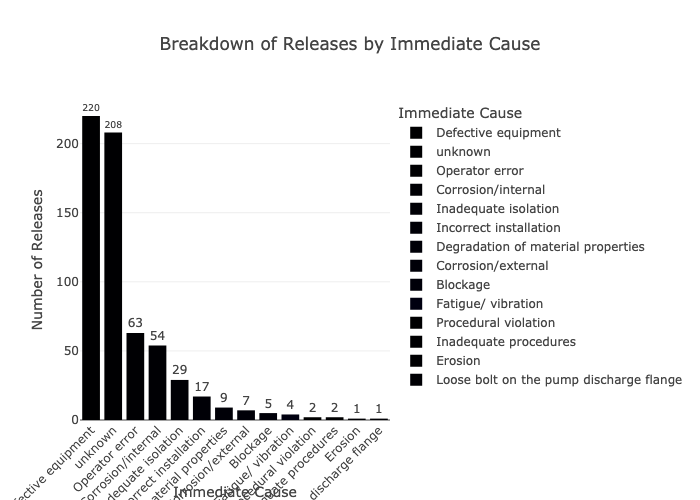

In [37]:
charts[0]